In [ ]:
'''no significant result'''

In [1]:
import util as u
import numpy as np
import os
import copy

In [2]:
fig_folder="figure"

iphone_par=u.load_item("iphone_par.pkl")
samsung_par=u.load_item("samsung_par.pkl")

In [3]:
samsung_par

{'h_par': {'min': 142.2, 'max': 166.9},
 'w_par': {'min': 69.1, 'max': 77.1},
 'rl_par': {'min': 6.52, 'max': 8.31},
 'rm_par': {'min': 6.52, 'max': 8.03},
 'm_ushift_par': {'min': 0, 'max': 1.76},
 'm_lshift_par': {'min': 0, 'max': 2.44},
 'rs_par': {'min': 4.89, 'max': 6.97},
 'sux_par': {'min': -0.37, 'max': 1.33},
 'suh_par': {'min': -0.76, 'max': 0.86},
 'slh_par': {'min': 0.41, 'max': 1.97},
 'camera_r_h_par': {'min': 7.82, 'max': 8.01},
 'camera2r_par': {'min': 7.79, 'max': 9.96},
 'camera_d_par': {'min': 7.29, 'max': 11.03},
 'camera_r1_par': {'min': 2.47, 'max': 2.49},
 'camera_r2_par': {'min': 1.59, 'max': 1.63},
 'ring_par': {'min': 2.36, 'max': 2.65},
 'camera_m_h_par': {'min': 5.23, 'max': 5.37},
 'camera_m_r_par': {'min': 1.81, 'max': 1.98},
 'trap_u_par': {'min': 12.45, 'max': 13.56},
 'trap_l_par': {'min': 8.51, 'max': 10.5},
 'trap_h_ratio_par': {'min': 0.1, 'max': 1},
 'vol_l_par': {'min': 19.25, 'max': 20.04},
 'vol_h_par': {'min': 28.76, 'max': 41.8},
 'bixby_l_par'

In [4]:
iphone_ref=u.iphone_interpolation\
(0.5,notch_random=0, lens_random=np.array([[[0,0,0,1]]]))
samsung_ref=u.samsung_interpolation(0.5)
iphone_observe=copy.deepcopy(iphone_ref)
samsung_observe=copy.deepcopy(samsung_ref)

In [5]:
iphone_ref

{'h': array([[146.15]]),
 'h2w_factor': array([[None]], dtype=object),
 'w': array([[71.15]]),
 'h2fillet_factor': array([[None]], dtype=object),
 'fillet': array([[10.75]]),
 'mute': array([[5.42]]),
 'mute2top': array([[27.615]]),
 'mute_h2power_factor': array([[None]], dtype=object),
 'power': array([[16.805]]),
 'mute_h2power_h_factor': array([[None]], dtype=object),
 'power2top': array([[42.285]]),
 'mute2vol': array([[12.705]]),
 'vol': array([[10.335]]),
 'mute_h2vol_gap_factor': array([[None]], dtype=object),
 'vol_gap': array([[13.135]]),
 'notch_r1': array([[0.98]]),
 'vshift': array([[0.5]]),
 'notch_r2': array([[3.28]]),
 'notch_h': array([[8.245]]),
 'notch_w': array([[31.825]]),
 'button_t': array([[0.495]]),
 'scr2pl': array([[3.185]]),
 'scr_gap2edge_gap_factor': array([[None]], dtype=object),
 'pl2edge': array([[1.25]]),
 'stripe_w': array([[0.755]]),
 'stripe2top': array([[14.66]]),
 'stripe_top2low_factor': array([[None]], dtype=object),
 'stripe2low': array([[14.66]

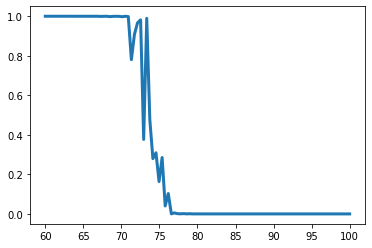

In [6]:
'''dataset: speaker at middle, no camera, prediction of norm and avg'''
import matplotlib.pyplot as plt
extra_folder="extrapolation"
iphone_folder=extra_folder+"/iphone"
u.initialize([iphone_folder])
temp_seed=1

iphone_ref=u.iphone_interpolation\
(0.5,notch_random=0, lens_random=np.array([[[0,0,0,0]]]))
# iphone_ref["notch_random"][0][0]=1
# iphone_ref["vshift"][0][0]=0.01
# iphone_ref["scr2pl"][0][0]=1
# iphone_ref["fillet"][0][0]=5
# iphone_ref["lens1p"][0][0]=0.9
# iphone_ref["lens1"][0][0]=1e-9
# iphone_ref["notch_r2"][0][0]=1

iphone_observe=copy.deepcopy(iphone_ref)
data_size=(1,100)
target="w"
low, up = 60, 100
target_array=np.linspace(low, up, data_size[1])

for i in iphone_observe:
    if i=="lens_random":
        iphone_observe[i]=np.ones((data_size[0],data_size[1],4))*\
        np.array([0,0,0,0])
    elif iphone_ref[i][0][0]==None:
        iphone_observe[i]=np.zeros(data_size)
    elif i==target:
        iphone_observe[i]=\
        np.expand_dims(target_array,0)
    else:
        iphone_observe[i]=np.ones(data_size)*iphone_ref[i][0][0]
        
u.create_iphone_dataset(iphone_observe, iphone_folder,\
                      draw_nodes=0, stroke_aug=0, stripe=0, extra=1)


iphone_path=u.get_filelist(dir,iphone_folder)

#exclude the generated other curves
exclude_group=[ x for x in iphone_path if "group" not in x ]
exclude=[ x for x in exclude_group if "curve" not in x ]
exclude_sorted=u.sort_list(exclude)



norm_pred_rec=[]
avg_pred_rec=[]
# model_path="rec_sage_ns2.pt"

model_path1="phonesage_naug_norm.pt"
mode1="norm"

for pic_path in exclude_sorted:
#     print(pic_path)
    _, norm_iphone_pred=u.test1svg(model_path1, pic_path, brand="iphone", resample=1,\
                prediction=1, ablation=iphone_folder+"/"+model_path1,\
                mode=mode1, temp_seed=temp_seed)
    norm_pred_rec.append(norm_iphone_pred[0][0])

plt.plot(target_array, norm_pred_rec, linewidth=3)

In [7]:
u.dump_item(target_array,"x.pkl")
u.dump_item(norm_pred_rec,"y_no_lens_speaker_mid.pkl")

In [8]:
# iphone_ref
# samsung_par
target_array = u.load_item("x.pkl")
# norm_pred_rec=u.load_item("y_no_lens_speaker_up.pkl")
norm_pred_rec2=u.load_item("y_no_lens_speaker_mid.pkl")

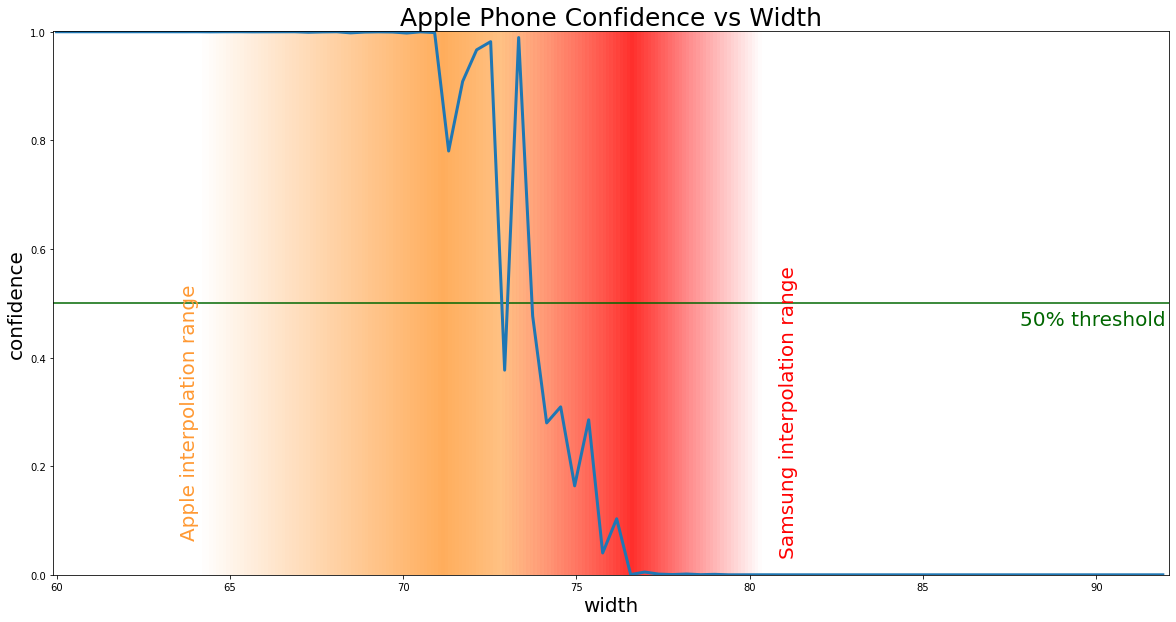

In [10]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
title="Apple Phone Confidence vs Width"
low, up =60,100
pad=0.1
bound_c=[1,0.6,0.2]
l_in, r_in=\
iphone_par["w_par"]["min"],iphone_par["w_par"]["max"]
plt.figure(figsize=(20,10))
u.plot_rainbow(l_in, r_in, alpha_end=0.01, color=bound_c)
plt.text(l_in-pad, 0.3, 'Apple interpolation range', ha='right',\
         rotation=90, va='center', fontsize=20, color=bound_c)

iphone_h=(iphone_par["h_par"]["min"]+iphone_par["h_par"]["min"])/2
samsung_h_avg=(samsung_par["h_par"]["min"]+samsung_par["h_par"]["min"])/2

norm_r=iphone_h/samsung_h_avg

l_in2=(69.1-2*7.415)/154.55*146.15+2*10.75
r_in2=(77.1-2*7.415)/154.55*146.15+2*10.75

bound_c2=[1,0,0]
u.plot_rainbow(l_in2, r_in2, alpha_end=0.01, color=bound_c2)
plt.text(r_in2+10*pad, 0.3, 'Samsung interpolation range', ha='right',\
         rotation=90, va='center', fontsize=20, color=bound_c2)

plt.hlines(0.5, low-0.1, up+0.1,color=[0,0.4,0])
plt.text(low+0.8*(up-low)+0.01, 0.47, '50% threshold', ha='right',\
         va='center', fontsize=20, color=[0,0.4,0])

plt.axis((low-0.1,low+0.8*(up-low)+0.1,0,1.001))
plt.title(title, fontsize=25)
plt.xlabel("width", fontsize=20)
plt.ylabel("confidence", fontsize=20)


plt.plot(target_array[:80], norm_pred_rec2[:80], linewidth=3,label="norm mid")
# plt.plot(target_array[:80], norm_pred_rec[:80], linewidth=3,label="norm mid")
plt.savefig("%s.jpg"%title)

In [43]:
samsung_ref

{'h': array([[154.55]]),
 'w': array([[73.1]]),
 'rl': array([[7.415]]),
 'rm': array([[7.275]]),
 'rs': array([[5.93]]),
 'm_ushift': array([[0.88]]),
 'm_lshift': array([[1.22]]),
 'sux': array([[0.48]]),
 'suh': array([[0.05]]),
 'slh': array([[1.19]]),
 'camera_r_h': array([[7.915]]),
 'camera_ct': array([[0]]),
 'camera_d': array([[9.16]]),
 'camera_r1': array([[2.48]]),
 'camera_r2': array([[1.61]]),
 'camera2r': array([[8.875]]),
 'ring_r': array([[2.505]]),
 'camera_m_h': array([[5.3]]),
 'camera_m_r': array([[1.895]]),
 'trap_u': array([[13.005]]),
 'trap_l': array([[9.505]]),
 'trap_h_ratio': array([[0.55]]),
 'button_h': 0.75,
 'vol_l': array([[19.645]]),
 'vol_h': array([[35.28]]),
 'bixby_l': array([[9.04]]),
 'bixby_h': array([[57.925]]),
 'power_l': array([[12.455]]),
 'power_free_h': array([[39.165]]),
 'power_unfree_h': array([[63.95]])}

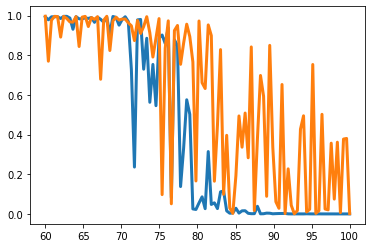

In [89]:
'''dataset: speaker at middle, 4th camera, prediction of norm and avg'''
import matplotlib.pyplot as plt
extra_folder="extrapolation"
iphone_folder=extra_folder+"/iphone"
u.initialize([iphone_folder])
temp_seed=1

iphone_ref=u.iphone_interpolation\
(0.5,notch_random=0, lens_random=np.array([[[0,0,0,0]]]))
# iphone_ref["notch_random"][0][0]=1
# iphone_ref["vshift"][0][0]=0.01
# iphone_ref["scr2pl"][0][0]=1
# iphone_ref["fillet"][0][0]=5
# iphone_ref["lens1p"][0][0]=0.9
# iphone_ref["lens1"][0][0]=1e-9
# iphone_ref["notch_r2"][0][0]=1

iphone_observe=copy.deepcopy(iphone_ref)
data_size=(1,100)
target="w"
low, up = 60, 100
target_array=np.linspace(low, up, data_size[1])

for i in iphone_observe:
    if i=="lens_random":
        iphone_observe[i]=np.ones((data_size[0],data_size[1],4))*\
        np.array([0,0,1,0])
    elif iphone_ref[i][0][0]==None:
        iphone_observe[i]=np.zeros(data_size)
    elif i==target:
        iphone_observe[i]=\
        np.expand_dims(target_array,0)
    else:
        iphone_observe[i]=np.ones(data_size)*iphone_ref[i][0][0]
        
u.create_iphone_dataset(iphone_observe, iphone_folder,\
                      draw_nodes=0, stroke_aug=0, stripe=0, extra=1)


iphone_path=u.get_filelist(dir,iphone_folder)

#exclude the generated other curves
exclude_group=[ x for x in iphone_path if "group" not in x ]
exclude=[ x for x in exclude_group if "curve" not in x ]
exclude_sorted=u.sort_list(exclude)



norm_pred_rec=[]
avg_pred_rec=[]
# model_path="rec_sage_ns2.pt"

model_path1="phonesage_naug_norm.pt"
mode1="norm"
model_path2="phonesage_naug_avg.pt"
mode2="avg"
for pic_path in exclude_sorted:
#     print(pic_path)
    _, norm_iphone_pred=u.test1svg(model_path1, pic_path, brand="iphone", resample=1,\
                prediction=1, ablation=iphone_folder+"/"+model_path1,\
                mode=mode1, temp_seed=temp_seed)
    norm_pred_rec.append(norm_iphone_pred[0][0])
    
    _, avg_iphone_pred=u.test1svg(model_path2, pic_path, brand="iphone", resample=1,\
                prediction=1, ablation=iphone_folder+"/"+model_path2,\
                mode=mode2, temp_seed=temp_seed)
    avg_pred_rec.append(avg_iphone_pred[0][0])

plt.plot(target_array, norm_pred_rec, linewidth=3)
plt.plot(target_array, avg_pred_rec, linewidth=3)

In [90]:
u.dump_item(norm_pred_rec,"y_norm_mid_lens4.pkl")
u.dump_item(avg_pred_rec,"y_avg_mid_lens4.pkl")

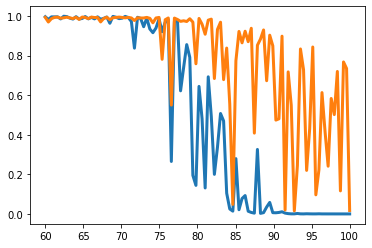

In [91]:
'''dataset: speaker at top, 4th camera, prediction of norm and avg'''
import matplotlib.pyplot as plt
extra_folder="extrapolation"
iphone_folder=extra_folder+"/iphone"
u.initialize([iphone_folder])
temp_seed=1

iphone_ref=u.iphone_interpolation\
(0.5,notch_random=0, lens_random=np.array([[[0,0,0,0]]]))
iphone_ref["notch_random"][0][0]=1
# iphone_ref["vshift"][0][0]=0.01
# iphone_ref["scr2pl"][0][0]=1
# iphone_ref["fillet"][0][0]=5
# iphone_ref["lens1p"][0][0]=0.9
# iphone_ref["lens1"][0][0]=1e-9
# iphone_ref["notch_r2"][0][0]=1

iphone_observe=copy.deepcopy(iphone_ref)
data_size=(1,100)
target="w"
low, up = 60, 100
target_array=np.linspace(low, up, data_size[1])

for i in iphone_observe:
    if i=="lens_random":
        iphone_observe[i]=np.ones((data_size[0],data_size[1],4))*\
        np.array([0,0,1,0])
    elif iphone_ref[i][0][0]==None:
        iphone_observe[i]=np.zeros(data_size)
    elif i==target:
        iphone_observe[i]=\
        np.expand_dims(target_array,0)
    else:
        iphone_observe[i]=np.ones(data_size)*iphone_ref[i][0][0]
        
u.create_iphone_dataset(iphone_observe, iphone_folder,\
                      draw_nodes=0, stroke_aug=0, stripe=0, extra=1)


iphone_path=u.get_filelist(dir,iphone_folder)

#exclude the generated other curves
exclude_group=[ x for x in iphone_path if "group" not in x ]
exclude=[ x for x in exclude_group if "curve" not in x ]
exclude_sorted=u.sort_list(exclude)



norm_pred_rec2=[]
avg_pred_rec2=[]
# model_path="rec_sage_ns2.pt"

model_path1="phonesage_naug_norm.pt"
mode1="norm"
model_path2="phonesage_naug_avg.pt"
mode2="avg"
for pic_path in exclude_sorted:
#     print(pic_path)
    _, norm_iphone_pred=u.test1svg(model_path1, pic_path, brand="iphone", resample=1,\
                prediction=1, ablation=iphone_folder+"/"+model_path1,\
                mode=mode1, temp_seed=temp_seed)
    norm_pred_rec2.append(norm_iphone_pred[0][0])
    
    _, avg_iphone_pred=u.test1svg(model_path2, pic_path, brand="iphone", resample=1,\
                prediction=1, ablation=iphone_folder+"/"+model_path2,\
                mode=mode2, temp_seed=temp_seed)
    avg_pred_rec2.append(avg_iphone_pred[0][0])

plt.plot(target_array, norm_pred_rec2, linewidth=3)
plt.plot(target_array, avg_pred_rec2, linewidth=3)

In [92]:
u.dump_item(norm_pred_rec2,"y_norm_up_lens4.pkl")
u.dump_item(avg_pred_rec2,"y_avg_up_lens4.pkl")

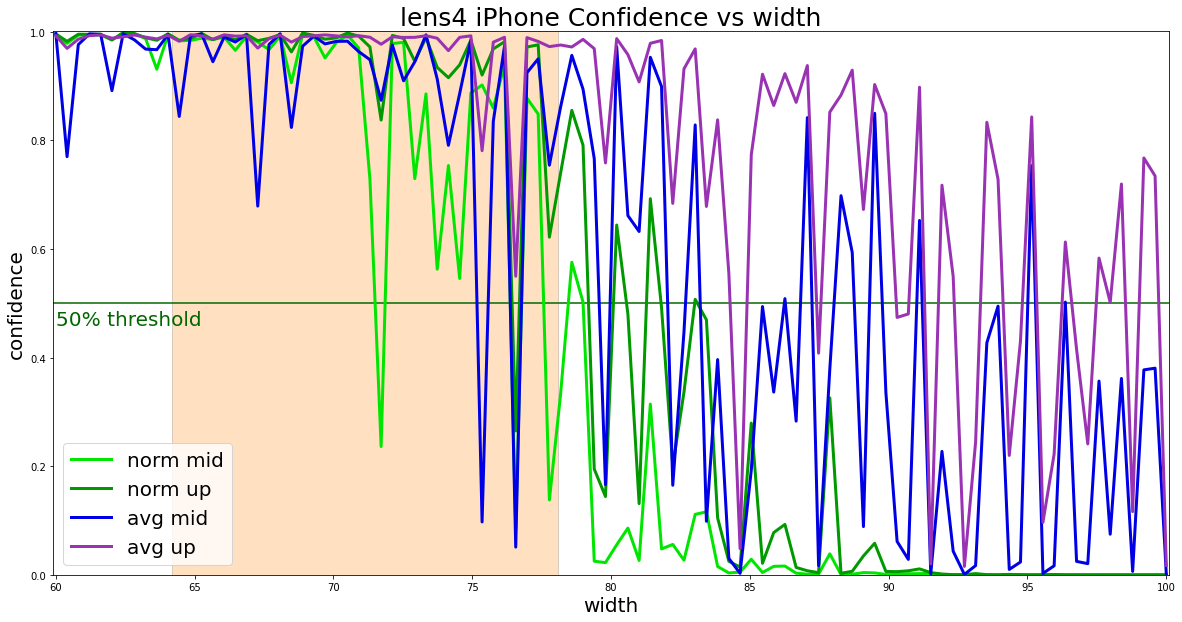

In [98]:
'''plot for camera 4'''
from matplotlib.patches import Rectangle
title="lens4 iPhone Confidence vs width"
low, up =60,100
pad=0.1
bound_c=[1,0.6,0.2]
l_in, r_in=\
iphone_par["w_par"]["min"],iphone_par["w_par"]["max"]
plt.figure(figsize=(20,10))
# plt.vlines(left_bound, -0.01,1.01,color="red")
# plt.vlines(right_bound, -0.01,1.01,color="red")
# plt.vlines(l_in, -0.01,1.01,color=bound_c)
# plt.text(l_in+pad, 0.6, 'iphone boundary', ha='left',\
#          rotation=90, va='center', fontsize=20, color=bound_c)

# plt.vlines(r_in, -0.01,1.01,color=bound_c)
# plt.text(r_in+pad, 0.2, 'iphone boundary', ha='left',\
#          rotation=90, va='center', fontsize=20, color=bound_c)


plt.gca().add_patch(Rectangle((l_in,-0.01),r_in-l_in,1.02,
                    edgecolor='black',
                    facecolor=bound_c,
                    lw=0.5,
                    alpha=0.3))


iphone_h=(iphone_par["h_par"]["min"]+iphone_par["h_par"]["min"])/2
samsung_h_avg=(samsung_par["h_par"]["min"]+samsung_par["h_par"]["min"])/2

norm_r=iphone_h/samsung_h_avg

unnorm_l_in2, unnorm_r_in2=\
samsung_par["rl_par"]["min"],samsung_par["rl_par"]["max"]

l_in2, r_in2=unnorm_l_in2*norm_r, unnorm_r_in2*norm_r

bound_c2=[1,0,0]

plt.hlines(0.5, low-0.1, up+0.1,color=[0,0.4,0])
plt.text(low+0.01, 0.47, '50% threshold', ha='left',\
         va='center', fontsize=20, color=[0,0.4,0])

plt.axis((low-0.1,up+0.1,0,1.001))
plt.title(title, fontsize=25)
plt.xlabel("width", fontsize=20)
plt.ylabel("confidence", fontsize=20)


plt.plot(target_array, norm_pred_rec, linewidth=3, color=[0,0.9,0],label="norm mid")
plt.plot(target_array, norm_pred_rec2, linewidth=3, color=[0,0.6,0],label="norm up")
plt.plot(target_array, avg_pred_rec, linewidth=3,color=[0,0,0.9],label="avg mid")
plt.plot(target_array, avg_pred_rec2, linewidth=3, color=[0.6,0.2,0.7],label="avg up")
plt.legend(fontsize=20)
plt.savefig("%s.jpg"%title)

In [94]:
#reload the list
path="figure/iphone/w and speaker"
avg_4cam_up=u.load_item("%s/y_avg_up_lens4.pkl"%path)
avg_4cam_mid=u.load_item("%s/y_avg_mid_lens4.pkl"%path)
avg_ncam_up=u.load_item("%s/y_avg_up_no_lens.pkl"%path)
avg_ncam_mid=u.load_item("%s/y_avg_mid_no_lens.pkl"%path)
norm_4cam_up=u.load_item("%s/y_norm_up_lens4.pkl"%path)
norm_4cam_mid=u.load_item("%s/y_norm_mid_lens4.pkl"%path)
norm_ncam_up=u.load_item("%s/y_norm_up_no_lens.pkl"%path)
norm_ncam_mid=u.load_item("%s/y_norm_mid_no_lens.pkl"%path)

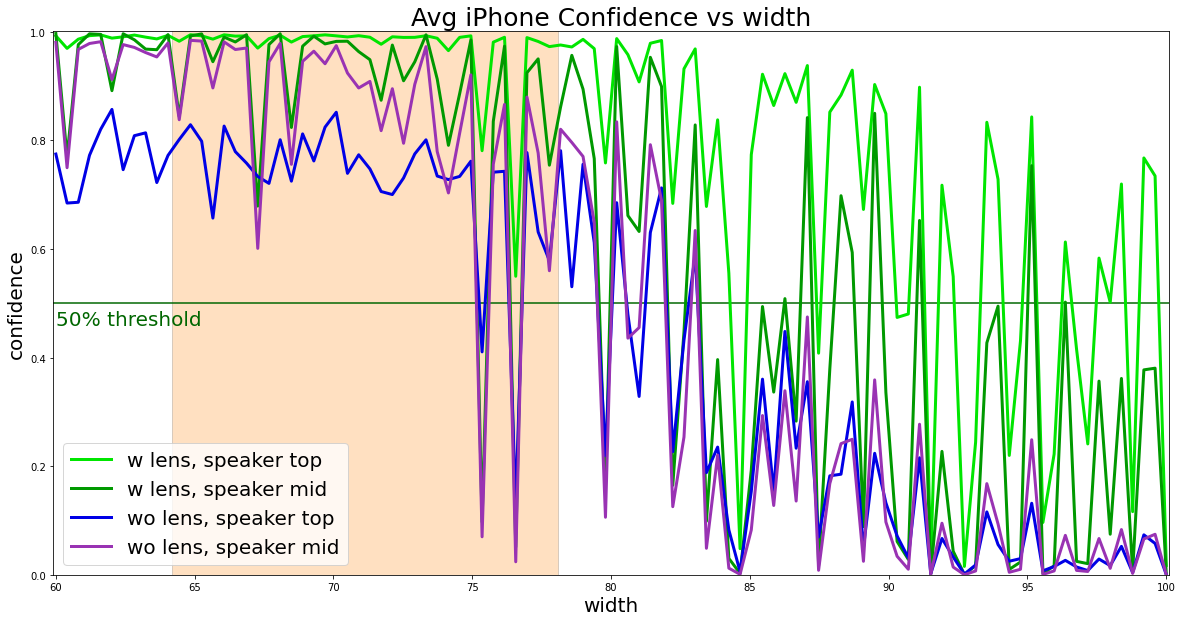

In [96]:
'''plot for avg'''
'''plot for camera 4'''
from matplotlib.patches import Rectangle
title="Avg iPhone Confidence vs width"
low, up =60,100
pad=0.1
bound_c=[1,0.6,0.2]
l_in, r_in=\
iphone_par["w_par"]["min"],iphone_par["w_par"]["max"]
plt.figure(figsize=(20,10))
# plt.vlines(left_bound, -0.01,1.01,color="red")
# plt.vlines(right_bound, -0.01,1.01,color="red")
# plt.vlines(l_in, -0.01,1.01,color=bound_c)
# plt.text(l_in+pad, 0.6, 'iphone boundary', ha='left',\
#          rotation=90, va='center', fontsize=20, color=bound_c)

# plt.vlines(r_in, -0.01,1.01,color=bound_c)
# plt.text(r_in+pad, 0.2, 'iphone boundary', ha='left',\
#          rotation=90, va='center', fontsize=20, color=bound_c)


plt.gca().add_patch(Rectangle((l_in,-0.01),r_in-l_in,1.02,
                    edgecolor='black',
                    facecolor=bound_c,
                    lw=0.5,
                    alpha=0.3))


iphone_h=(iphone_par["h_par"]["min"]+iphone_par["h_par"]["min"])/2
samsung_h_avg=(samsung_par["h_par"]["min"]+samsung_par["h_par"]["min"])/2

norm_r=iphone_h/samsung_h_avg

unnorm_l_in2, unnorm_r_in2=\
samsung_par["rl_par"]["min"],samsung_par["rl_par"]["max"]

l_in2, r_in2=unnorm_l_in2*norm_r, unnorm_r_in2*norm_r

bound_c2=[1,0,0]

plt.hlines(0.5, low-0.1, up+0.1,color=[0,0.4,0])
plt.text(low+0.01, 0.47, '50% threshold', ha='left',\
         va='center', fontsize=20, color=[0,0.4,0])

plt.axis((low-0.1,up+0.1,0,1.001))
plt.title(title, fontsize=25)
plt.xlabel("width", fontsize=20)
plt.ylabel("confidence", fontsize=20)


plt.plot(target_array, avg_4cam_up, linewidth=3, color=[0,0.9,0],label="w lens, speaker top")
plt.plot(target_array, avg_4cam_mid, linewidth=3, color=[0,0.6,0],label="w lens, speaker mid")
plt.plot(target_array, avg_ncam_up, linewidth=3,color=[0,0,0.9],label="wo lens, speaker top")
plt.plot(target_array, avg_ncam_mid, linewidth=3, color=[0.6,0.2,0.7],label="wo lens, speaker mid")
plt.legend(fontsize=20)
plt.savefig("%s.jpg"%title)

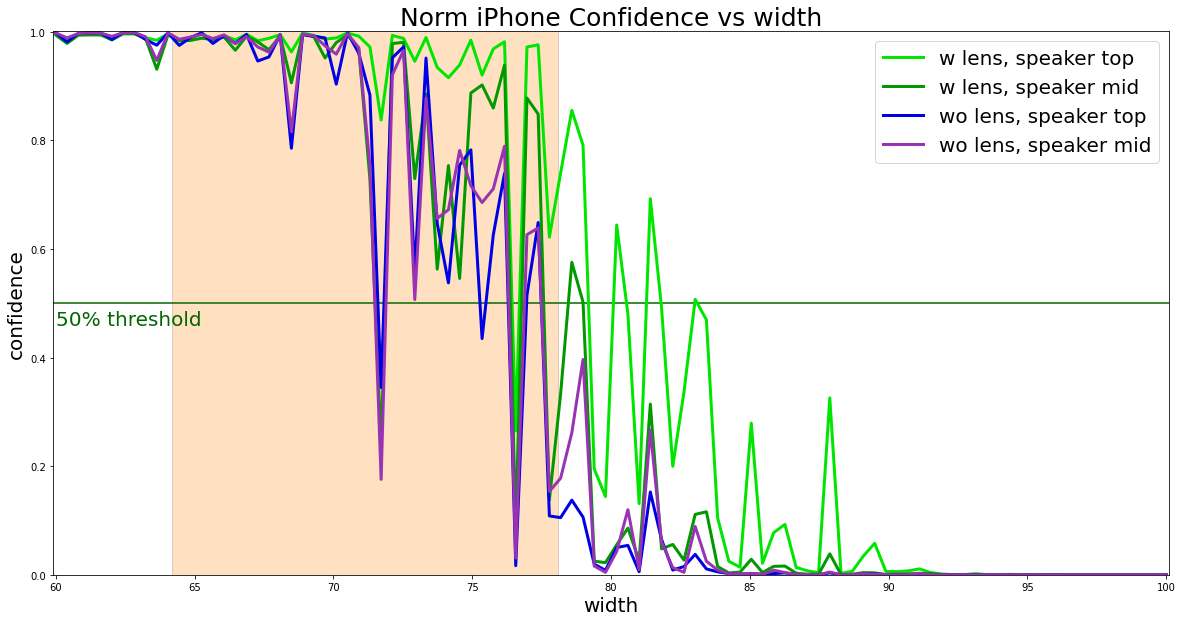

In [97]:
'''plot for norm'''

from matplotlib.patches import Rectangle
title="Norm iPhone Confidence vs width"
low, up =60,100
pad=0.1
bound_c=[1,0.6,0.2]
l_in, r_in=\
iphone_par["w_par"]["min"],iphone_par["w_par"]["max"]
plt.figure(figsize=(20,10))
# plt.vlines(left_bound, -0.01,1.01,color="red")
# plt.vlines(right_bound, -0.01,1.01,color="red")
# plt.vlines(l_in, -0.01,1.01,color=bound_c)
# plt.text(l_in+pad, 0.6, 'iphone boundary', ha='left',\
#          rotation=90, va='center', fontsize=20, color=bound_c)

# plt.vlines(r_in, -0.01,1.01,color=bound_c)
# plt.text(r_in+pad, 0.2, 'iphone boundary', ha='left',\
#          rotation=90, va='center', fontsize=20, color=bound_c)


plt.gca().add_patch(Rectangle((l_in,-0.01),r_in-l_in,1.02,
                    edgecolor='black',
                    facecolor=bound_c,
                    lw=0.5,
                    alpha=0.3))


iphone_h=(iphone_par["h_par"]["min"]+iphone_par["h_par"]["min"])/2
samsung_h_avg=(samsung_par["h_par"]["min"]+samsung_par["h_par"]["min"])/2

norm_r=iphone_h/samsung_h_avg

unnorm_l_in2, unnorm_r_in2=\
samsung_par["rl_par"]["min"],samsung_par["rl_par"]["max"]

l_in2, r_in2=unnorm_l_in2*norm_r, unnorm_r_in2*norm_r

bound_c2=[1,0,0]

plt.hlines(0.5, low-0.1, up+0.1,color=[0,0.4,0])
plt.text(low+0.01, 0.47, '50% threshold', ha='left',\
         va='center', fontsize=20, color=[0,0.4,0])

plt.axis((low-0.1,up+0.1,0,1.001))
plt.title(title, fontsize=25)
plt.xlabel("width", fontsize=20)
plt.ylabel("confidence", fontsize=20)


plt.plot(target_array, norm_4cam_up, linewidth=3, color=[0,0.9,0],label="w lens, speaker top")
plt.plot(target_array, norm_4cam_mid, linewidth=3, color=[0,0.6,0],label="w lens, speaker mid")
plt.plot(target_array, norm_ncam_up, linewidth=3,color=[0,0,0.9],label="wo lens, speaker top")
plt.plot(target_array, norm_ncam_mid, linewidth=3, color=[0.6,0.2,0.7],label="wo lens, speaker mid")
plt.legend(fontsize=20)
plt.savefig("%s.jpg"%title)

In [ ]:
'''
Conclusion:
1. lens4 > no lens
2. avg model:
    when lens present, speaker interferes.
    when no lens, speaker helps.
3. norm model:
    when lens present, speaker interferes.
    when no lens, speaker helps a little but not significant.
4. mid model might have a better resistance to width change.
'''